This example aims to have two target orbits, and one observer orbit. The observer is tasked with monitoring the two targets to minimize the trace covariance of the state over the simulation horizon. We use a PPO agent that is rewarded for minimizing the trace covariance of the target states to the best of its ability.

In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import dill
import numpy as np

import matplotlib.pyplot as plt

from data_util.target_generation import TargetGenerator



In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])



In [3]:
tg = TargetGenerator([x0_1, x0_2, x0_3], periods=[3.225, 3.225, 6.45])

In [4]:
out = tg.gen_phased_ics([0, 3, 0])

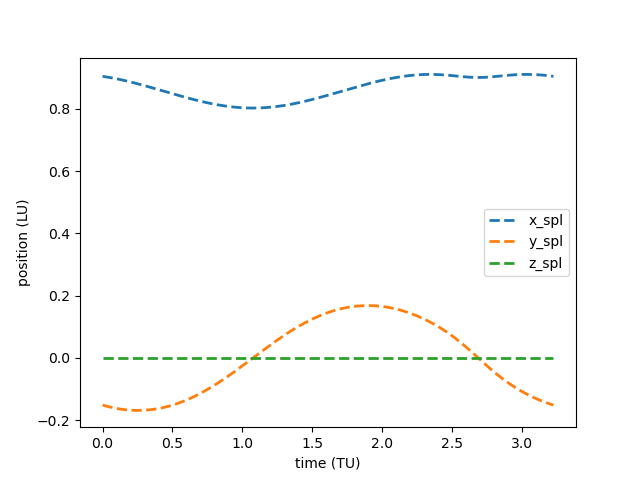

In [5]:
tt = np.linspace(0, 1*tg.periods[1], 300)
data_spl = out[2]["spline"](tt)

plt.figure(6)
plt.clf()
plt.xlabel("time (TU)")
plt.ylabel("position (LU)")
# plt.plot(data[:, 0], data[:, 1:4], label = ["x", "y", "z"])
plt.plot(tt, data_spl[:, :3], label = ["x_spl", "y_spl", "z_spl"], linestyle = "--", linewidth = 2.0)
plt.legend()
plt.show()

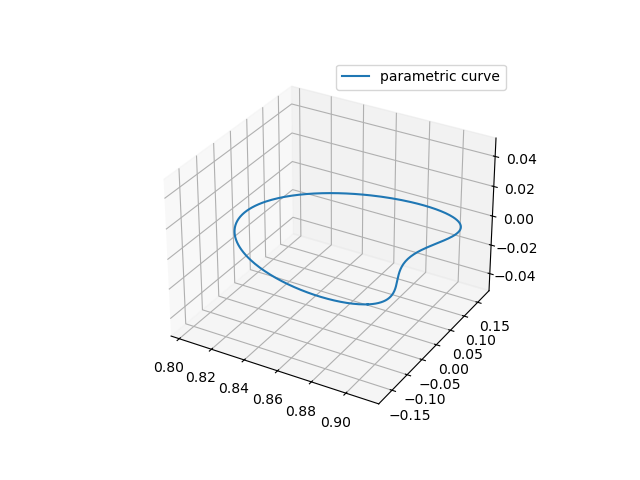

In [6]:
ax = plt.figure(7).add_subplot(projection='3d')

# Prepare arrays x, y, z

ax.plot(data_spl[:, 0], data_spl[:, 1], data_spl[:, 2], label='parametric curve')
ax.legend()

plt.show()